# Ennoncés 

1) Problem 1
Study the python code template_CNN.py where a Convolutional Neural Network is used to predict if an image is a cat or a dog.
2) Problem 2
Apply the CNN to predict the labels of the images in dataset/single_prediction.
3) Problem 3
Study the python code template_RNN.py where a LSTM recurrent neural network is used to predict the stock value of Google.
4) Problem 4
Think about how to use a GRU recurrent network and apply it on the same dataset to compare the results of both kinds of recurrent networks.

# Problem 1

Study the python code template_CNN.py where a Convolutional Neural Network is used to predict if an image is a cat or a dog.

In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/CNN/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Datasets/CNN/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000//32,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000//32)

2023-11-21 16:21:03.903284: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-21 16:21:03.903304: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-21 16:21:03.903310: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-21 16:21:03.903345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-21 16:21:03.903360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25


/var/folders/c6/dvmqz81j59g3qs_b7r4gm6640000gn/T/ipykernel_3168/1224997300.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,
2023-11-21 16:21:04.990746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.7027 - accuracy: 0.5460

2023-11-21 16:21:24.027168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 23s 90ms/step - loss: 0.7027 - accuracy: 0.5460 - val_loss: 0.6557 - val_accuracy: 0.6139
Epoch 2/25
250/250 [==============================] - 21s 83ms/step - loss: 0.6603 - accuracy: 0.6194 - val_loss: 0.6433 - val_accuracy: 0.6310
Epoch 3/25
250/250 [==============================] - 20s 82ms/step - loss: 0.6428 - accuracy: 0.6364 - val_loss: 0.6373 - val_accuracy: 0.6497
Epoch 4/25
250/250 [==============================] - 22s 87ms/step - loss: 0.6675 - accuracy: 0.6407 - val_loss: 0.6929 - val_accuracy: 0.6421
Epoch 5/25
250/250 [==============================] - 21s 84ms/step - loss: 0.9554 - accuracy: 0.6025 - val_loss: 0.7398 - val_accuracy: 0.6321
Epoch 6/25
250/250 [==============================] - 21s 83ms/step - loss: 1.2436 - accuracy: 0.6059 - val_loss: 2.9608 - val_accuracy: 0.5423
Epoch 7/25
250/250 [==============================] - 21s 83ms/step - loss: 2.0045 - accuracy: 0.5938 - val_loss: 2.0497 - val_accuracy: 0.6139
Epo

In [2]:
# Sauvegarder le modèle
classifier.save('chien_or_chat.h5')

/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Problem 2
Apply the CNN to predict the labels of the images in dataset/single_prediction.

In [6]:
# Use the trained model to predict cat or dog
# Image to predict is in dataset/single_prediction/cat_or_dog_1.jpg and dataset/single_prediction/cat_or_dog_2.jpg

from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Charger le modèle
# Si vous avez déjà un modèle sauvegardé :
# classifier = load_model('chien_or_chat.h5')

tableau_chemin = ['Datasets/CNN/single_prediction/cat_or_dog_1.jpg', 'Datasets/CNN/single_prediction/cat_or_dog_2.jpg']


for k in range(len(tableau_chemin)):
    # Prétraiter l'image
    image_test = image.load_img(tableau_chemin[k], target_size = (64, 64)) # Charger l'image et on a met à la taille 64x64 comme on a fait pour entrainer le modèle
    image_test = image.img_to_array(image_test) # Convertir l'image en tableau numpy
    image_test = np.expand_dims(image_test, axis = 0) # Ajouter une dimension pour avoir un batch de 1 image
    image_test = image_test / 255.0 # Normaliser l'image
    
    # Prédiction
    resultat = classifier.predict(image_test)
    if resultat[0][0] >= 0.5:
        prediction = 'chien'
    else:
        prediction = 'chat'
    
    print(prediction)

2023-11-21 16:31:23.343738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 685ms/step
chien
1/1 [==============================] - 0s 13ms/step
chat


# Problem 3
Study the python code template_RNN.py where a LSTM recurrent neural network is used to predict the stock value of Google.

Epoch 1/100


2023-11-21 16:41:36.616575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:36.969565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:37.668668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:37.747257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:37.825892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:38.271110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:41:39.286944: I tensorflow/core/grappler/optimizers/cust

37/37 [==============================] - 7s 48ms/step - loss: 0.0339
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0044
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0033
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0028
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0023
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0023
Epoch 7/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0022
Epoch 8/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0022
Epoch 9/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0021
Epoch 10/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0020
Epoch 11/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0018
Epoch 12/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 13/100
37/37 [=================

2023-11-21 16:43:56.965573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:43:57.113748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:43:57.203424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:43:57.269739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-21 16:43:57.338522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 111ms/step


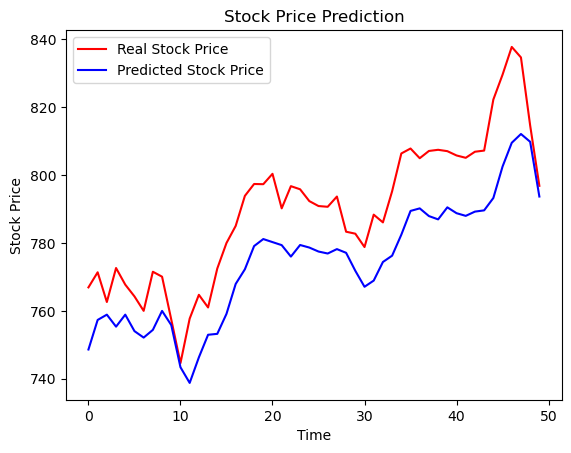

In [7]:
# Recurrent Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np

from templates.rnn_functions import build_series,load_regressor,load_dataset,build_regressor,get_subset,apply_inverse_transform,plot_stock_prices


stock_file='./Datasets/RNN/Google_Stock_Price'
n_obs=60
n_test_examples=50
regressor_filename=None
features=['Open','High','Low']
rnn_structure=(50,50,50,50)
n_epochs=100


training_set,training_set_scaled,sc,real_stock_price,real_stock_price_scaled=load_dataset('{}.PA.csv'.format(stock_file),n_test_examples,features)

# Creating a data structure with 60 timesteps and 1 output
X_train = build_series(training_set_scaled,n_obs)

id_price=0
y_train = np.array(training_set_scaled[n_obs:,id_price])


# Part 2 - Build or load the RNN

if regressor_filename is None:
    # Part 2 - Building the RNN    
    regressor=build_regressor(rnn_structure,(X_train.shape[1], X_train.shape[2]),dropout=0.2)
    
    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = 32)
else:
    regressor=load_regressor(regressor_filename)


# Part 3 - Making the predictions and visualising the results

# Getting the predicted stock price
inputs=get_subset(training_set_scaled,real_stock_price_scaled,n_obs)

X_test=build_series(inputs,n_obs)

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = apply_inverse_transform( predicted_stock_price, X_train.shape[2], sc )

# Visualising the results
plot_stock_prices(real_stock_price,predicted_stock_price)

# Problem 4
Think about how to use a GRU recurrent network and apply it on the same dataset to compare the results of both kinds of recurrent networks.